## Import Libraries

In [1]:
import pandas as pd           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

## Path Finding

In [2]:
import io
%cd "C:\Users\ADMIN\Desktop\Projects"

C:\Users\ADMIN\Desktop\Projects


## Import Data

In [3]:
house=pd.read_csv("House_Cleaning.csv")

# About Data

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29204 entries, 0 to 29203
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   s.no             29204 non-null  int64  
 1   price            29204 non-null  int64  
 2   space            29204 non-null  float64
 3   room             29204 non-null  int64  
 4   bedroom          29204 non-null  int64  
 5   furniture        29204 non-null  int64  
 6   latitude         28958 non-null  float64
 7   longitude        28958 non-null  float64
 8   city_area        29027 non-null  object 
 9   floor            29069 non-null  float64
 10  max_floor        29035 non-null  float64
 11  apartment_type   28411 non-null  object 
 12  renovation_type  28732 non-null  object 
 13  balcony          29204 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 3.1+ MB


# Drop Unnecessary Variables

In [5]:
house=house.drop("s.no",axis=1)
house=house.drop(["latitude","longitude"],axis=1)

# Shape Of Data

In [6]:
print("Number of Obesrvations:", house.shape[0])
print("Number of Variables:", house.shape[1])

Number of Obesrvations: 29204
Number of Variables: 11


# Variable Names

In [7]:
house.columns

Index(['price', 'space', 'room', 'bedroom', 'furniture', 'city_area', 'floor',
       'max_floor', 'apartment_type', 'renovation_type', 'balcony'],
      dtype='object')

# Data Type of Each Variable

In [8]:
house.dtypes

price                int64
space              float64
room                 int64
bedroom              int64
furniture            int64
city_area           object
floor              float64
max_floor          float64
apartment_type      object
renovation_type     object
balcony              int64
dtype: object

# Starting 10 Rows

In [9]:
house.head(10)

,price,space,room,bedroom,furniture,city_area,floor,max_floor,apartment_type,renovation_type,balcony
0,107100,28.0,1,1,0,Saburtalo District,11.0,11.0,new,newly renovated,1
1,257000,72.0,3,1,1,Isani District,15.0,16.0,new,newly renovated,0
2,157200,53.0,2,1,0,Krtsanisi District,2.0,4.0,new,NaN,1
3,237200,80.0,3,2,0,Krtsanisi District,3.0,NaN,new,NaN,1
4,158200,60.0,2,1,0,Saburtalo District,14.0,NaN,old,newly renovated,0
5,184500,74.0,2,1,0,NaN,7.0,NaN,new,white frame,1
6,150300,57.0,2,1,0,NaN,1.0,6.0,new,white frame,1
7,125200,50.0,2,1,0,NaN,3.0,12.0,new,white frame,1
8,159500,96.1,3,1,0,NaN,2.0,8.0,NaN,black frame,1
9,429600,76.7,3,2,0,NaN,5.0,11.0,NaN,black frame,1


# Bottom 10 Rows

In [10]:
house.tail(10)

,price,space,room,bedroom,furniture,city_area,floor,max_floor,apartment_type,renovation_type,balcony
29194,178300,79.00,3,2,0,NaN,NaN,NaN,construction,NaN,1
29195,121800,51.00,2,1,0,NaN,NaN,NaN,construction,NaN,1
29196,56100,24.85,1,1,0,NaN,NaN,NaN,new,NaN,0
29197,60200,24.86,1,1,0,NaN,NaN,NaN,new,NaN,1
29198,124200,52.00,2,1,0,NaN,NaN,NaN,new,NaN,1
29199,179200,75.00,2,1,0,NaN,NaN,NaN,construction,NaN,1
29200,126600,53.00,2,1,0,NaN,NaN,NaN,new,NaN,1
29201,62400,25.75,1,1,0,NaN,NaN,NaN,new,NaN,1
29202,167200,70.00,3,2,0,NaN,NaN,NaN,new,NaN,1
29203,169300,75.00,3,2,0,NaN,5.0,8.0,construction,green frame,1


# Find Missing Values In Each Variable

In [11]:
house.isnull().sum().sort_values(ascending=False)

apartment_type     793
renovation_type    472
city_area          177
max_floor          169
floor              135
price                0
space                0
room                 0
bedroom              0
furniture            0
balcony              0
dtype: int64

# Split Catgorical And Numaric Columns

In [12]:
objcols=house[['room', 'bedroom', 'furniture','city_area', 'floor','apartment_type', 'renovation_type', 'balcony']]
numcols=house[['space','price','max_floor']]

In [13]:
objcols.head()

,room,bedroom,furniture,city_area,floor,apartment_type,renovation_type,balcony
0,1,1,0,Saburtalo District,11.0,new,newly renovated,1
1,3,1,1,Isani District,15.0,new,newly renovated,0
2,2,1,0,Krtsanisi District,2.0,new,NaN,1
3,3,2,0,Krtsanisi District,3.0,new,NaN,1
4,2,1,0,Saburtalo District,14.0,old,newly renovated,0


In [14]:
numcols.head()

,space,price,max_floor
0,28.0,107100,11.0
1,72.0,257000,16.0
2,53.0,157200,4.0
3,80.0,237200,NaN
4,60.0,158200,NaN


# Finding Value Counts in Each Variable in Catgorical Columns

In [15]:
for col in objcols.columns:
    frqe=objcols[col].value_counts(dropna=False)
    print(frqe)


3     11604
2      9473
4      4780
5      1557
1      1256
6       378
7        99
8        37
9        12
10        5
12        2
14        1
Name: room, dtype: int64
2    12189
1    10461
3     4835
4      950
0      769
Name: bedroom, dtype: int64
0    16629
1    12575
Name: furniture, dtype: int64
Saburtalo District      11466
Vake District            4609
Other                    2045
Didube District          1885
Mtatsminda District      1789
Isani District           1738
Nadzaladevi District     1336
Gldani District          1302
Samgori District         1292
Chugureti District        801
Krtsanisi District        764
NaN                       177
Name: city_area, dtype: int64
2.0      3371
3.0      3165
5.0      3005
4.0      2932
6.0      2468
1.0      2368
8.0      2037
7.0      1905
9.0      1710
10.0     1295
11.0     1037
12.0     1008
14.0      632
13.0      525
15.0      470
16.0      313
17.0      247
18.0      142
NaN       135
20.0       88
19.0       82
21.0       7

# Finding Missing Values in Percentail

In [16]:
objcols.isnull().sum().sort_values(ascending=False)/objcols.shape[0]

apartment_type     0.027154
renovation_type    0.016162
city_area          0.006061
floor              0.004623
room               0.000000
bedroom            0.000000
furniture          0.000000
balcony            0.000000
dtype: float64

# Impute Missing values with IDXMAX

In [17]:
for col in objcols.columns:
    objcols[col]=objcols[col].fillna(objcols[col].value_counts().idxmax())


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13700\2355401647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objcols[col]=objcols[col].fillna(objcols[col].value_counts().idxmax())
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13700\2355401647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objcols[col]=objcols[col].fillna(objcols[col].value_counts().idxmax())
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13700\2355401647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [18]:
objcols.isnull().sum().sort_values(ascending=False)/objcols.shape[0]

room               0.0
bedroom            0.0
furniture          0.0
city_area          0.0
floor              0.0
apartment_type     0.0
renovation_type    0.0
balcony            0.0
dtype: float64

# Find Missing Values in Numaric Columns

In [19]:
numcols.isnull().sum().sort_values(ascending=False)

max_floor    169
space          0
price          0
dtype: int64

# Impute Missing Values with Median

In [20]:
for col in numcols.columns:
    numcols[col]=numcols[col].fillna(numcols[col].value_counts().median())

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13700\1794417597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numcols[col]=numcols[col].fillna(numcols[col].value_counts().median())
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13700\1794417597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numcols[col]=numcols[col].fillna(numcols[col].value_counts().median())
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13700\1794417597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [21]:
numcols.isnull().sum().sort_values(ascending=False)

space        0
price        0
max_floor    0
dtype: int64

# Merge the Catgorical And Numaric Columns After Cleaning

In [22]:
housedf=pd.concat([numcols,objcols],axis=1)

In [23]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29204 entries, 0 to 29203
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   space            29204 non-null  float64
 1   price            29204 non-null  int64  
 2   max_floor        29204 non-null  float64
 3   room             29204 non-null  int64  
 4   bedroom          29204 non-null  int64  
 5   furniture        29204 non-null  int64  
 6   city_area        29204 non-null  object 
 7   floor            29204 non-null  float64
 8   apartment_type   29204 non-null  object 
 9   renovation_type  29204 non-null  object 
 10  balcony          29204 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.5+ MB


## Finding Descriptive Statistics on Numaric Columns

In [24]:
housedf[["space","price","max_floor"]].describe().T

,count,mean,std,min,25%,50%,75%,max
space,29204.0,87.569128,4.571769e+01,13.0,57.0,75.0,105.0,530.0
price,29204.0,298840.760170,1.952151e+06,3300.0,148300.0,214200.0,339400.0,329510000.0
max_floor,29204.0,11.041279,6.709657e+00,0.0,7.0,10.0,14.0,113.0


In [25]:
housedf[["space","price","max_floor"]].mode().T

,0
space,60.0
price,181200.0
max_floor,9.0


In [26]:
housedf[["space","price","max_floor"]].skew().T

space          1.943481
price        164.421028
max_floor      3.454674
dtype: float64

In [27]:
housedf[["space","price","max_floor"]].kurt().T

space            6.604434
price        27701.477819
max_floor       25.861962
dtype: float64

# Visualization Skewness, Kurtosis, Outliers of Price

Text(0.5, 0, 'price')

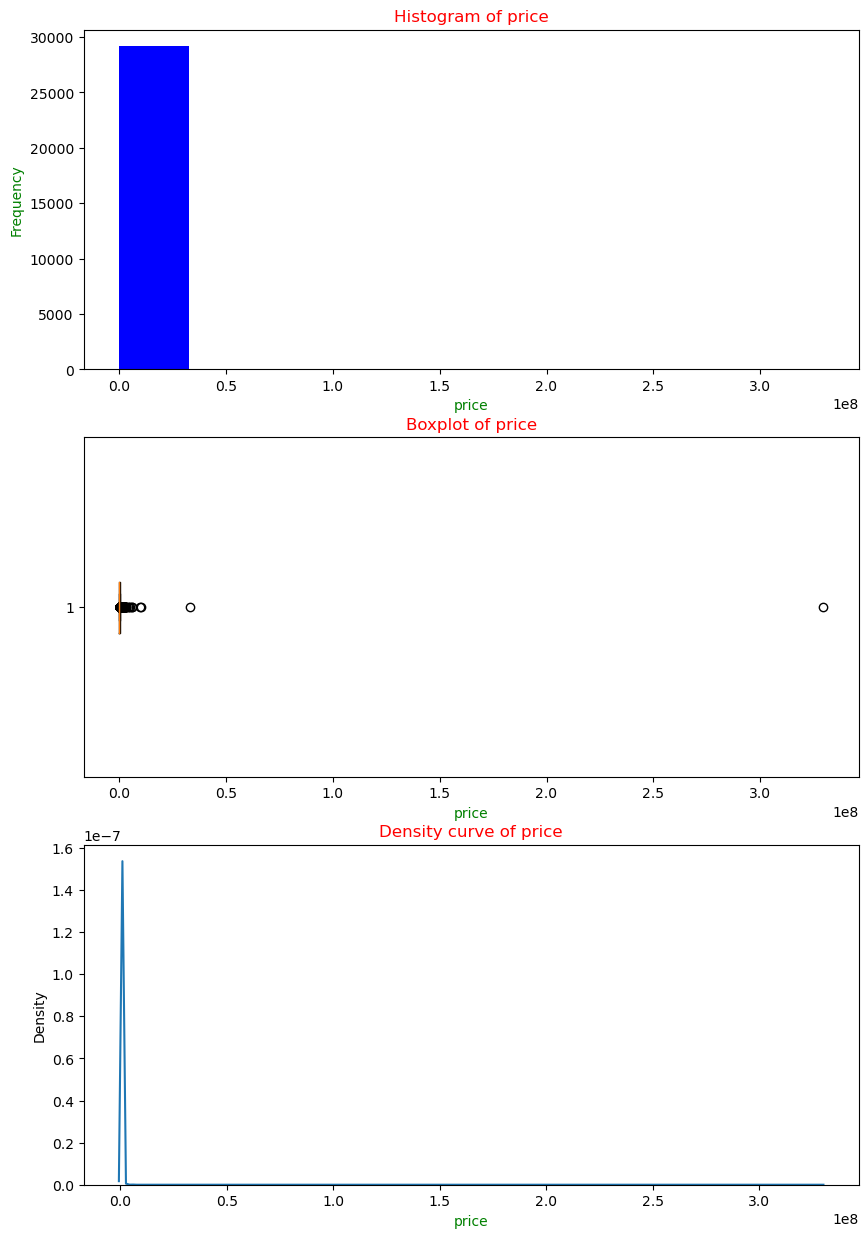

In [28]:
plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
plt.hist(housedf.price,color="blue")
plt.title('Histogram of price',color="red")
plt.xlabel('price',color="green")
plt.ylabel('Frequency',color="green")

plt.subplot(3,1,2)
plt.boxplot(housedf.price,vert=False)
plt.title('Boxplot of price',color="red")
plt.xlabel('price',color="green")

plt.subplot(3,1,3)
sns.kdeplot(housedf.price)
plt.title('Density curve of price',color="red")
plt.xlabel('price',color="green")

# Visualization Skewness, Kurtosis, Outliers of Space

Text(0.5, 0, 'space')

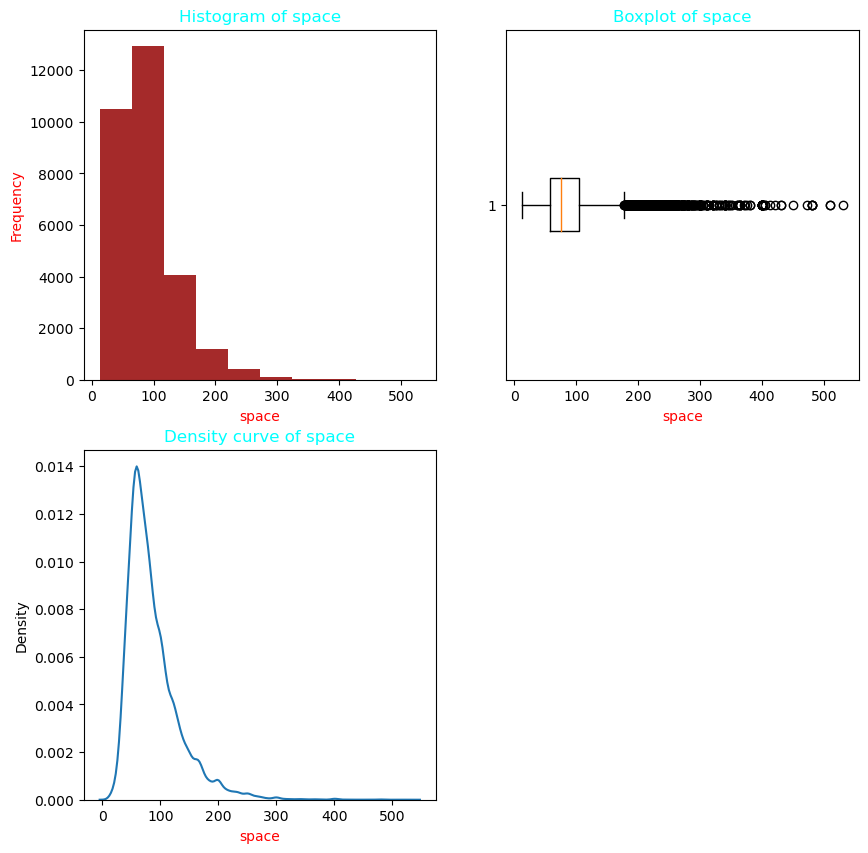

In [29]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.hist(housedf.space,color="Brown")
plt.title('Histogram of space',color="cyan")
plt.xlabel('space',color="red")
plt.ylabel('Frequency',color="red")

plt.subplot(2,2,2)
plt.boxplot(housedf.space,vert=False)
plt.title('Boxplot of space',color="cyan")
plt.xlabel('space',color="red")

plt.subplot(2,2,3)
sns.kdeplot(housedf.space)
plt.title('Density curve of space',color="cyan")
plt.xlabel('space',color="red")

# Visualization Skewness, Kurtosis, Outliers of Max_floor

Text(0, 0.5, 'Density')

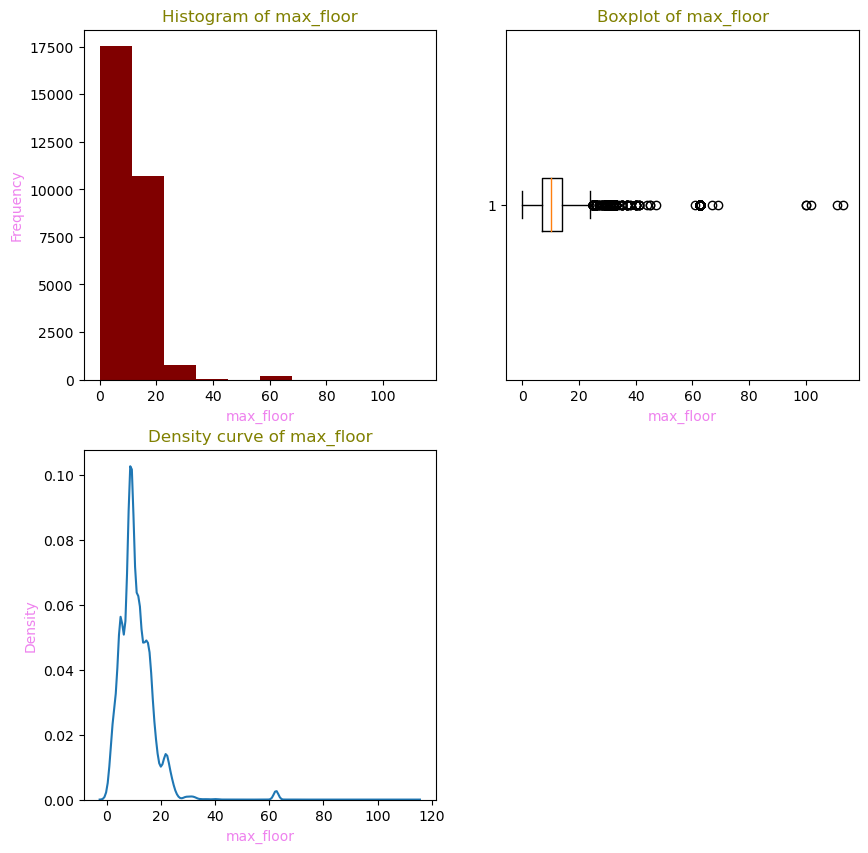

In [30]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.hist(housedf.max_floor,color="maroon")
plt.title('Histogram of max_floor',color="olive")
plt.xlabel('max_floor',color="violet")
plt.ylabel('Frequency',color="violet")

plt.subplot(2,2,2)
plt.boxplot(housedf.max_floor,vert=False)
plt.title('Boxplot of max_floor',color="olive")
plt.xlabel('max_floor',color="violet")

plt.subplot(2,2,3)
sns.kdeplot(housedf.max_floor)
plt.title('Density curve of max_floor',color="olive")
plt.xlabel('max_floor',color="violet")
plt.ylabel('Density',color="violet")

# Finding Covariance And Correlation 

In [31]:
housedf[["space","price","max_floor"]].cov()

,space,price,max_floor
space,2.090107e+03,8.253314e+06,-3.681744
price,8.253314e+06,3.810893e+12,-33837.227216
max_floor,-3.681744e+00,-3.383723e+04,45.019501


In [32]:
housedf[["space","price","max_floor"]].corr()

,space,price,max_floor
space,1.000000,0.092476,-0.012002
price,0.092476,1.000000,-0.002583
max_floor,-0.012002,-0.002583,1.000000


# Visualization of Correlation between Price And Space

<AxesSubplot: xlabel='price', ylabel='space'>

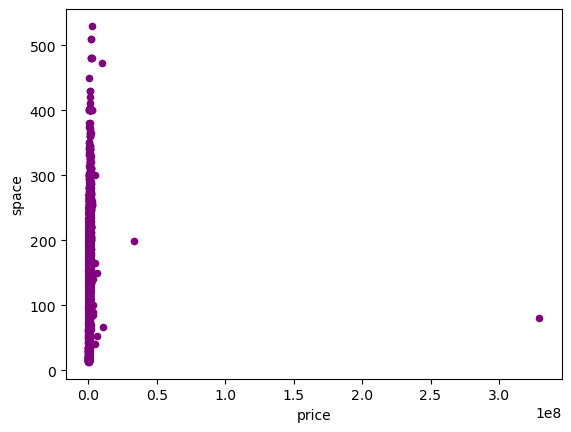

In [33]:
housedf.plot(x="price",y="space",kind='scatter',color="purple")

# Visualization of Correlation between Price And Max_Floor

<AxesSubplot: xlabel='price', ylabel='max_floor'>

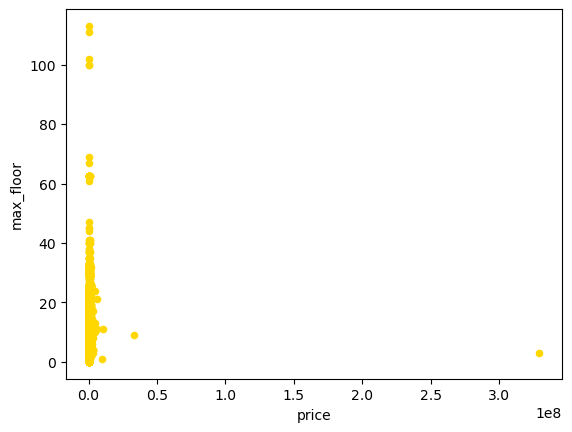

In [34]:
housedf.plot(x="price",y="max_floor",kind='scatter',color="gold")

# Correlation Values In Map Between All Numaric Columns

[Text(0.5, 1.0, 'Correlation between Variables')]

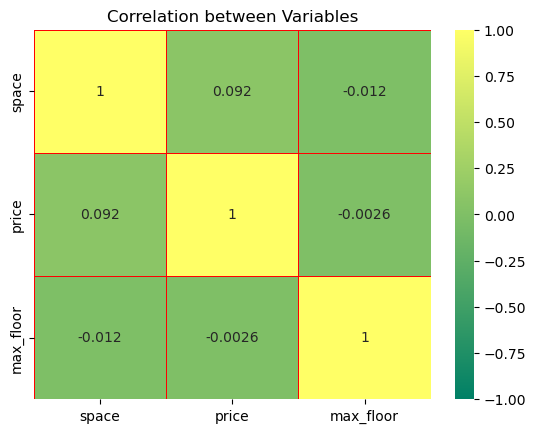

In [35]:
sns.heatmap(housedf[["space","price","max_floor"]].corr(),annot=True,cmap="summer",vmin=-1,vmax=1,
            linewidths=0.5,linecolor='red').set(title="Correlation between Variables")

# Visualization of Correlation Between All Numaric Columns

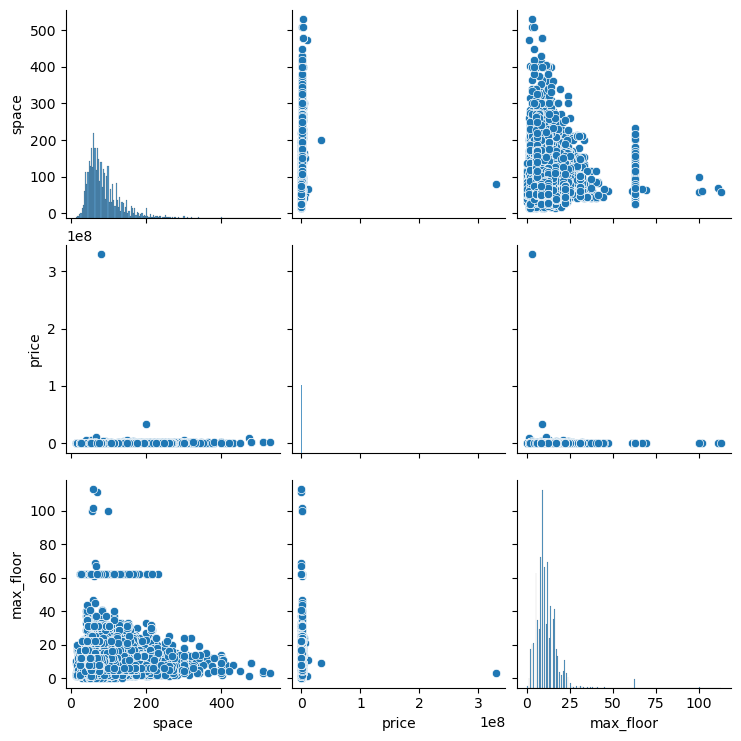

In [36]:
sns.pairplot(housedf[["space","price","max_floor"]])

# Finding Frequency Counts and Visualization

new             19684
old              8363
construction     1157
Name: apartment_type, dtype: int64


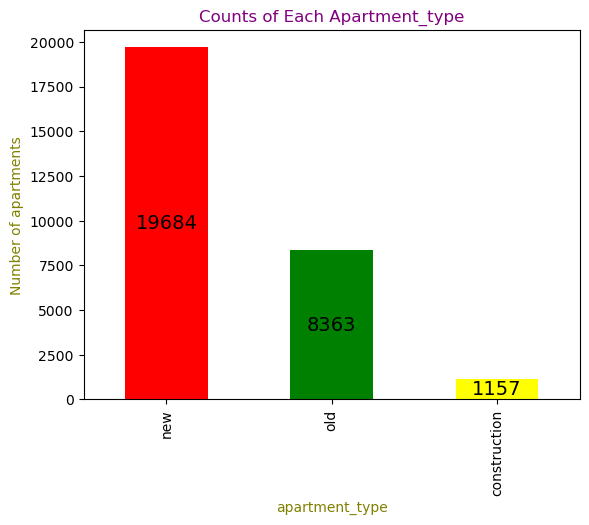

In [37]:
# Find How many Types Apartments and Its Counts,Percentail With Visualization

print(housedf.apartment_type.value_counts())

df=housedf.apartment_type.value_counts().plot(kind="bar",color=["red","green","yellow"])
for i in df.containers:
    df.bar_label(i,label_type="center",fontsize=14)
    plt.ylabel("Number of apartments",color="olive")
    plt.xlabel("apartment_type",color="olive")
    plt.title("Counts of Each Apartment_type",color="purple")



Text(0.5, 1.0, 'Counts of Apartment_type in %')

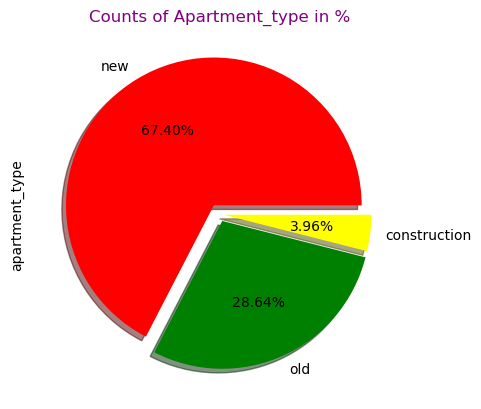

In [38]:
housedf.apartment_type.value_counts().plot(kind="pie",autopct="%.2f%%",colors=["red","green","yellow"],
                                          shadow=True,explode=[0.07,0.05,0.03])
plt.title("Counts of Apartment_type in %",color="purple")

2    12189
1    10461
3     4835
4      950
0      769
Name: bedroom, dtype: int64


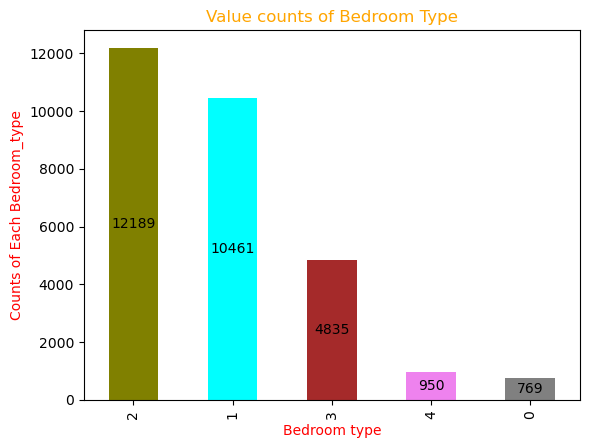

In [39]:
# Find How many Types Bedrooms and Its Counts,Percentail With Visualization


print(housedf.bedroom.value_counts())

df=housedf.bedroom.value_counts().plot(kind="bar",color=["olive","cyan","Brown","violet","grey"])
for i in df.containers:
    df.bar_label(i,label_type="center",fontsize=10)
    plt.xlabel("Bedroom type",color="red")
    plt.ylabel("Counts of Each Bedroom_type",color="red")
    plt.title("Value counts of Bedroom Type",color="Orange")

Text(0.5, 1.0, 'Value counts of Bedroom Type in %')

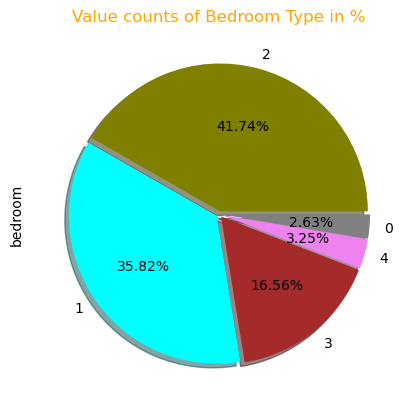

In [40]:
housedf.bedroom.value_counts().plot(kind="pie",autopct="%.2f%%",colors=["olive","cyan","Brown","violet","grey"],shadow=True,
                                   explode=[0.02,0.02,0.02,0.02,0.02])
plt.title("Value counts of Bedroom Type in %",color="Orange")

newly renovated     19231
old renovation       3700
white frame          2673
black frame          1319
green frame          1234
not renovated         647
under renovation      400
Name: renovation_type, dtype: int64


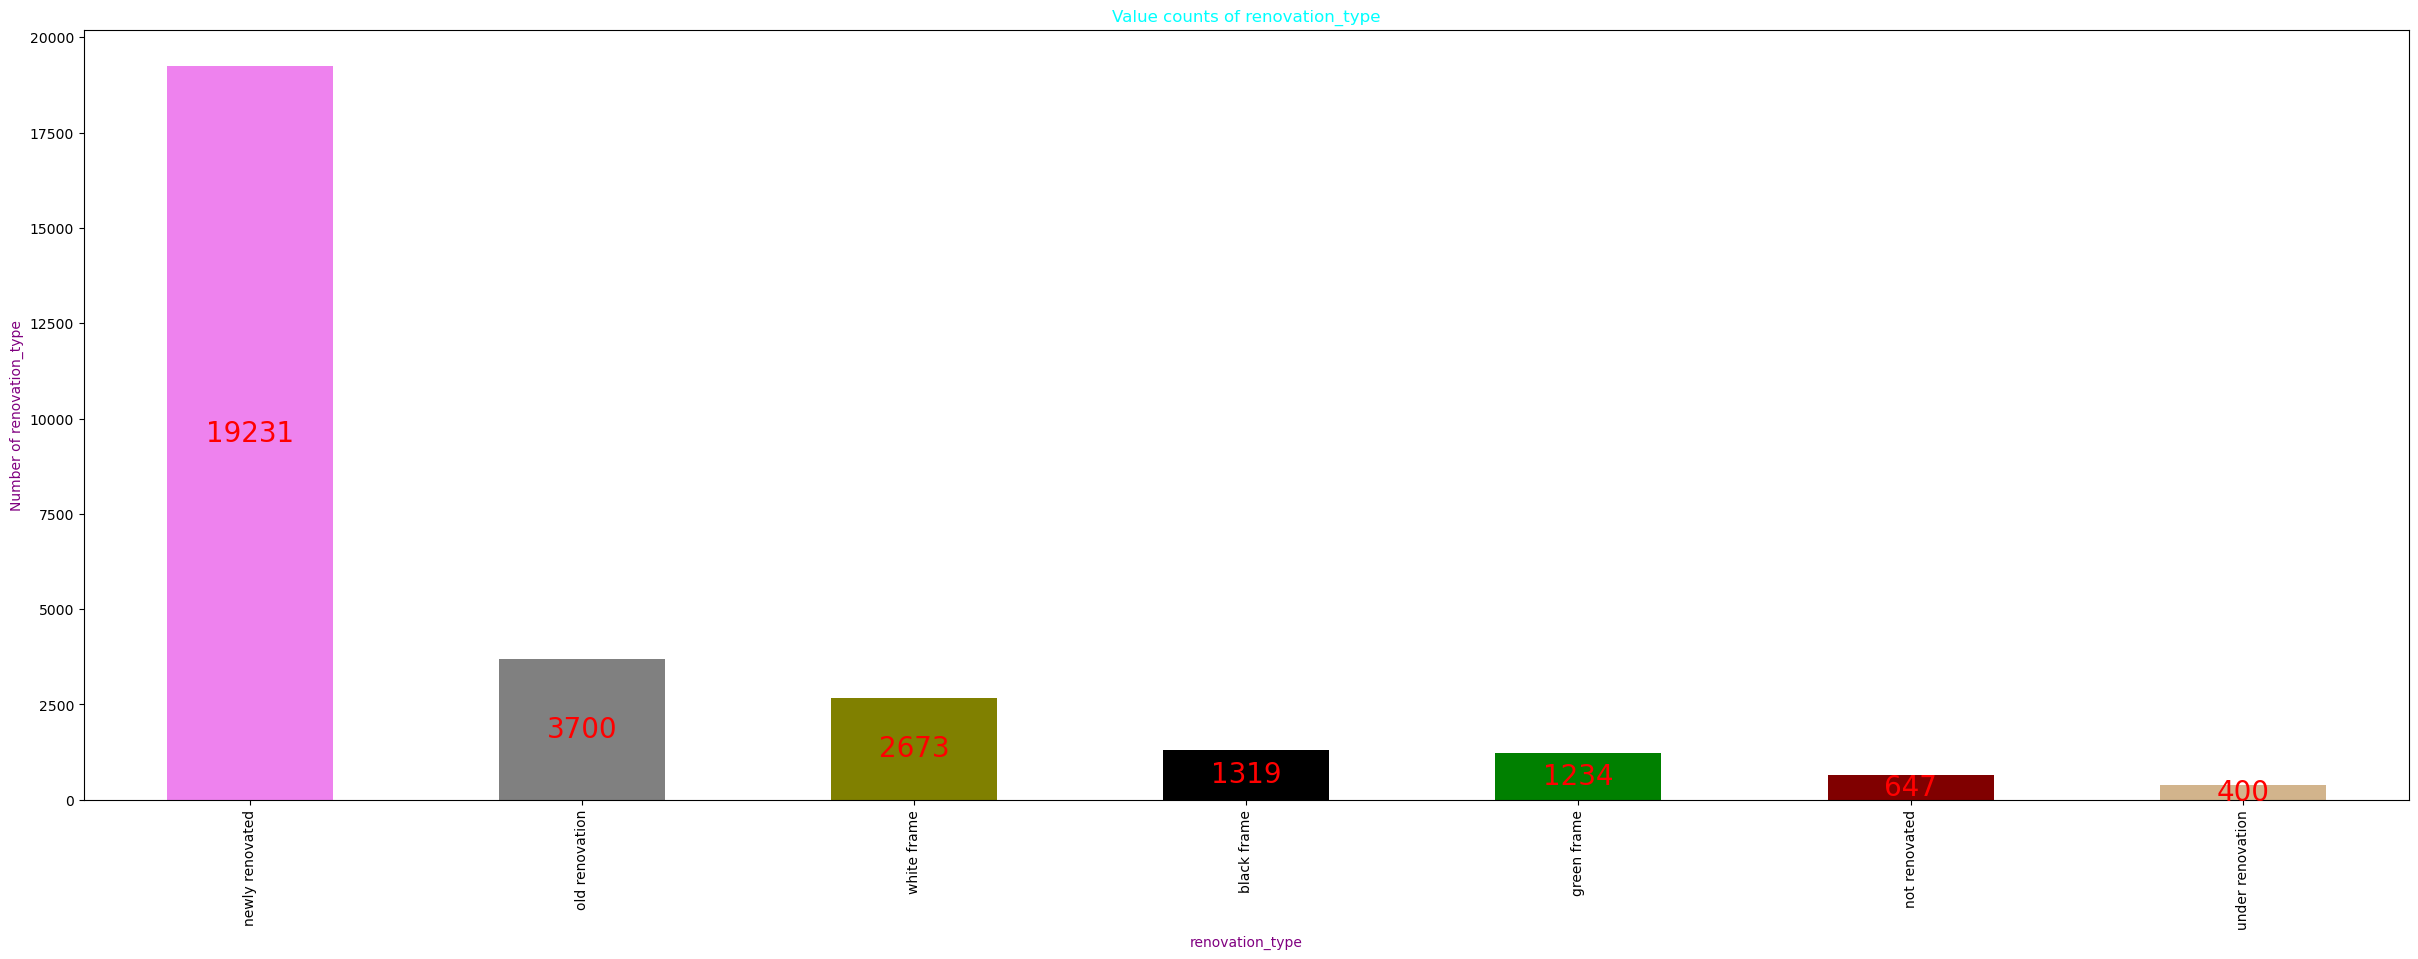

In [41]:
# Find How many Types renovation and Its Counts,Percentail With Visualization


print(housedf.renovation_type.value_counts())

plt.figure(figsize=(30,10))
df=housedf.renovation_type.value_counts().plot(kind="bar",color=["violet","grey","olive","black","green","Maroon","Tan"])
for i in df.containers:
    plt.bar_label(i,label_type="center",fontsize=20,color="red")
    plt.xlabel("renovation_type",color="purple")
    plt.ylabel("Number of renovation_type",color="purple")
    plt.title("Value counts of renovation_type",color="cyan")

Text(0.5, 1.0, 'Value counts of renovation_type in %')

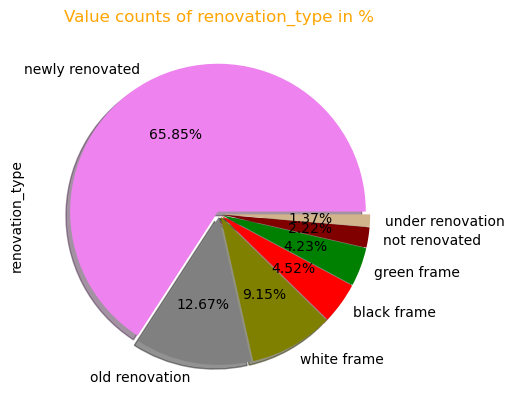

In [42]:
df=housedf.renovation_type.value_counts().plot(kind="pie",autopct="%.2f%%",colors=["violet","grey","olive","red","green","Maroon","Tan"],
                                            shadow=True,explode=[0.02,0.02,0.02,0.02,0.02,0.02,0.02])
plt.title("Value counts of renovation_type in %",color="Orange")

# Finding Average, Sum And Visualization

balcony
0    283701.208136
1    303208.619457
Name: price, dtype: float64


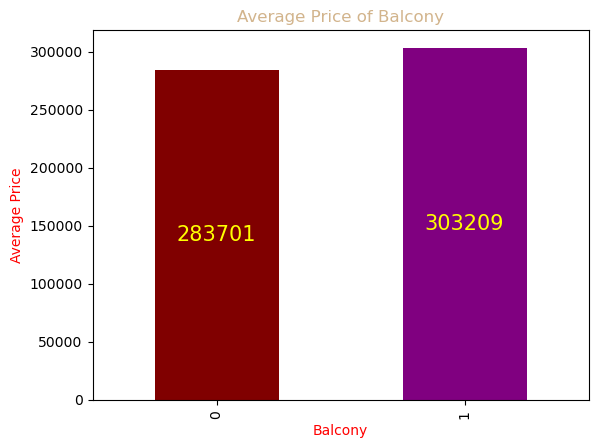

In [43]:
# What is the average price of balcony(no(0)/yes(1))


print(housedf.price.groupby(housedf.balcony).mean())

df=housedf.price.groupby(housedf.balcony).mean().plot(kind="bar",color=["maroon","purple"])
for i in df.containers:
    plt.bar_label(i,label_type="center",fontsize=15,color="yellow")
    plt.xlabel("Balcony",color="red")
    plt.ylabel("Average Price",color="red")
    plt.title("Average Price of Balcony",color="Tan")

Text(0.5, 1.0, 'Average Price of Balcony in %')

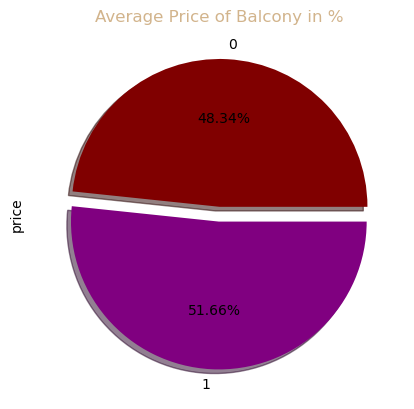

In [44]:
housedf.price.groupby(housedf.balcony).mean().plot(kind="pie",autopct="%.2f%%",colors=["maroon","purple"],shadow=True,
                                                  explode=(0.05,0.05))
plt.title("Average Price of Balcony in %",color="Tan")

floor
0.0        428.0
1.0      15146.0
2.0      32027.5
3.0      26181.0
4.0      28006.0
5.0      29849.0
6.0      26050.5
7.0      21717.0
8.0      23433.5
9.0      20880.5
10.0     18046.0
11.0     15678.0
12.0     15427.0
13.0      8368.5
14.0     10586.0
15.0      8103.0
16.0      5757.0
17.0      4820.0
18.0      2956.0
19.0      1792.0
20.0      2057.0
21.0      1876.5
22.0       839.0
23.0       967.0
24.0       244.0
25.0       477.0
26.0       327.0
28.0       116.0
31.0        31.0
33.0        14.0
45.0         5.0
55.0         6.0
56.0         2.0
70.0        11.0
78.0         8.0
111.0      123.0
127.0       93.5
Name: max_floor, dtype: float64


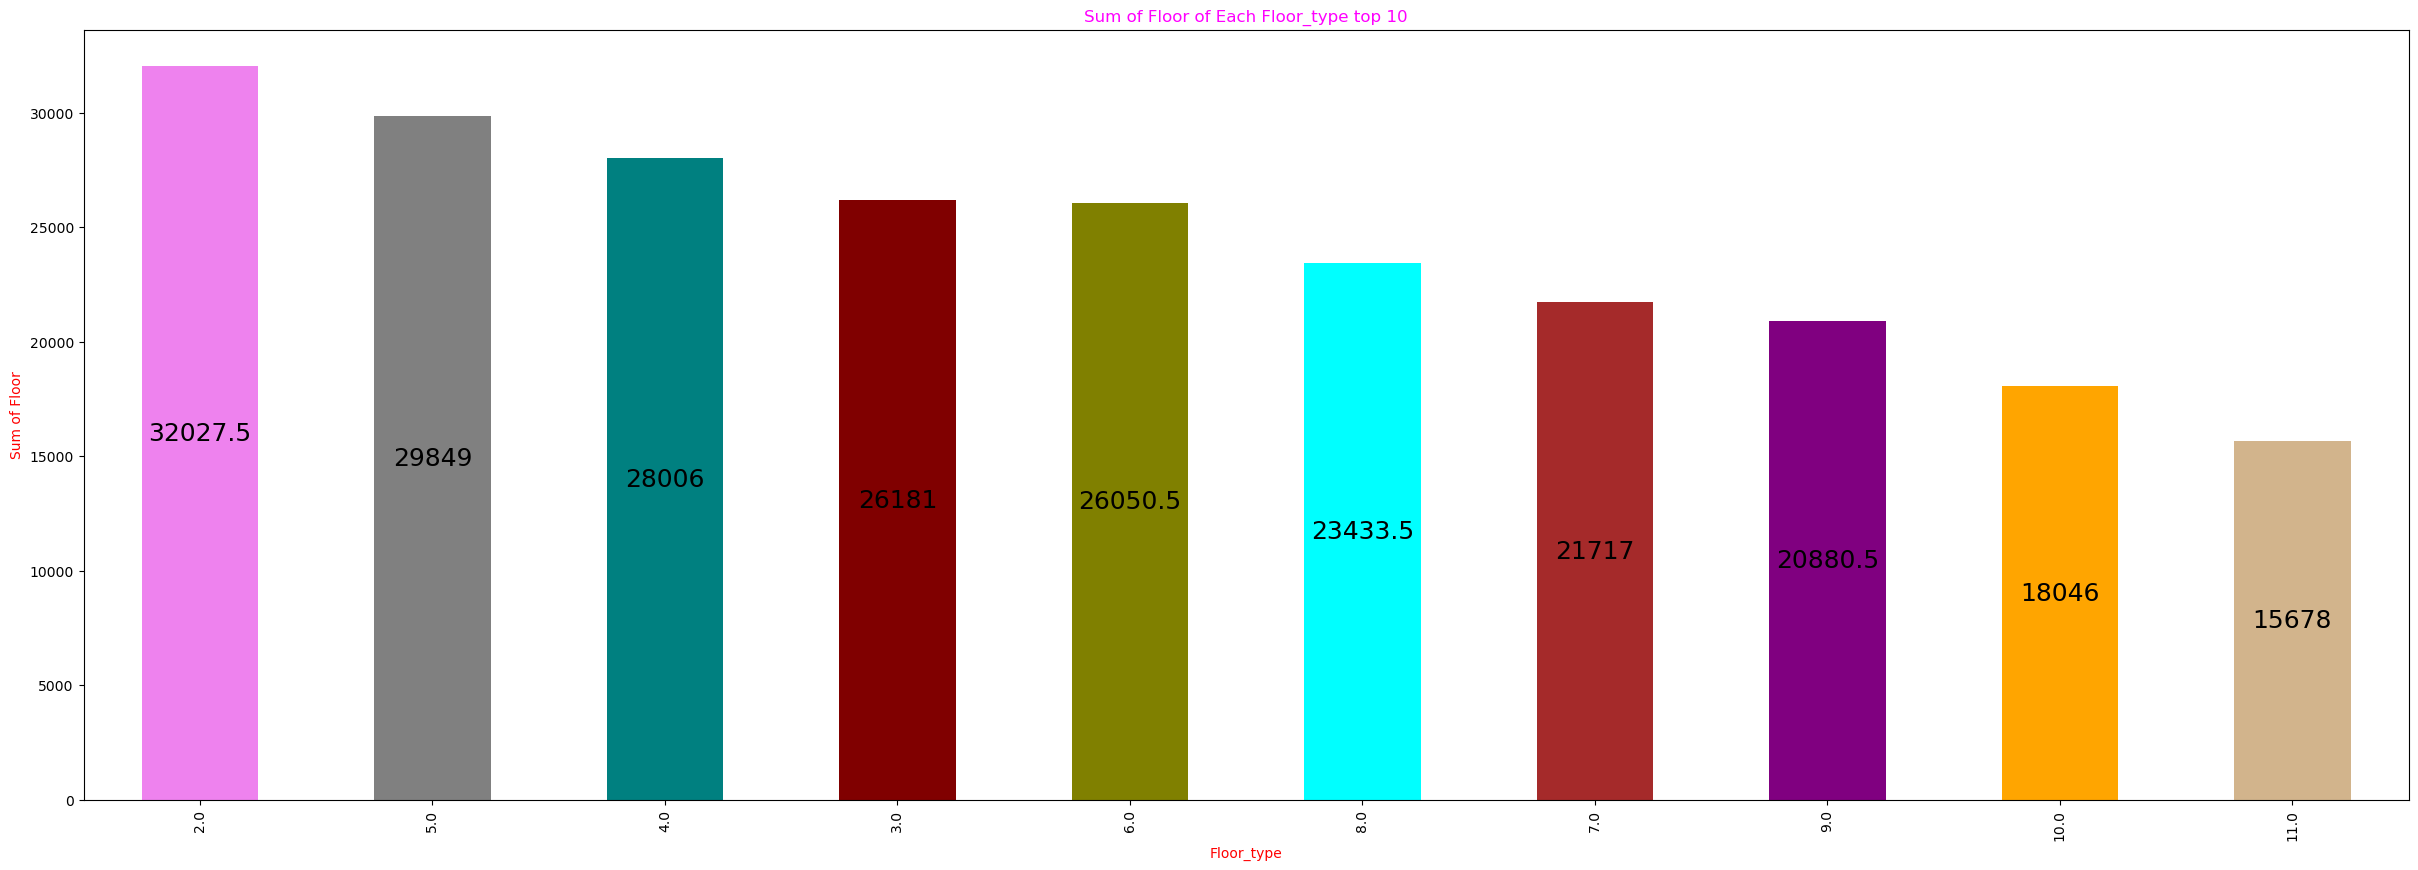

In [45]:
# What is the Total max_floor of floor

print(housedf.max_floor.groupby(housedf.floor).sum())


plt.figure(figsize=(30,10))
df=housedf.max_floor.groupby(housedf.floor).sum().nlargest(10).plot(kind="bar",
            color=["violet","grey","teal","maroon","olive","cyan","Brown","Purple","Orange","Tan"])
for i in df.containers:
    plt.bar_label(i,label_type="center",fontsize=18)
    plt.xlabel("Floor_type",color="red")
    plt.ylabel("Sum of Floor",color="red")
    plt.title("Sum of Floor of Each Floor_type top 10",color="Magenta")

Text(0.5, 1.0, 'Sum of Floor of Each Floor_type top 10 in %')

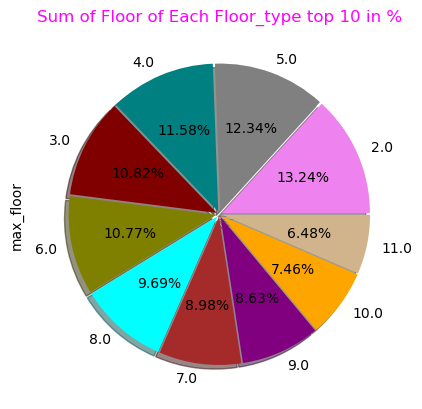

In [46]:
housedf.max_floor.groupby(housedf.floor).sum().nlargest(10).plot(kind="pie",autopct="%.2f%%",shadow=True,
            explode=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02],
            colors=["violet","grey","teal","maroon","olive","cyan","Brown","Purple","Orange","Tan"])
plt.title("Sum of Floor of Each Floor_type top 10 in %",color="Magenta")

city_area
Chugureti District      283721.223471
Didube District         213412.785146
Gldani District         140852.150538
Isani District          199531.933257
Krtsanisi District      278916.492147
Mtatsminda District     698645.444382
Nadzaladevi District    166279.041916
Other                   248798.973105
Saburtalo District      274963.588422
Samgori District        126716.718266
Vake District           435798.459536
Name: price, dtype: float64


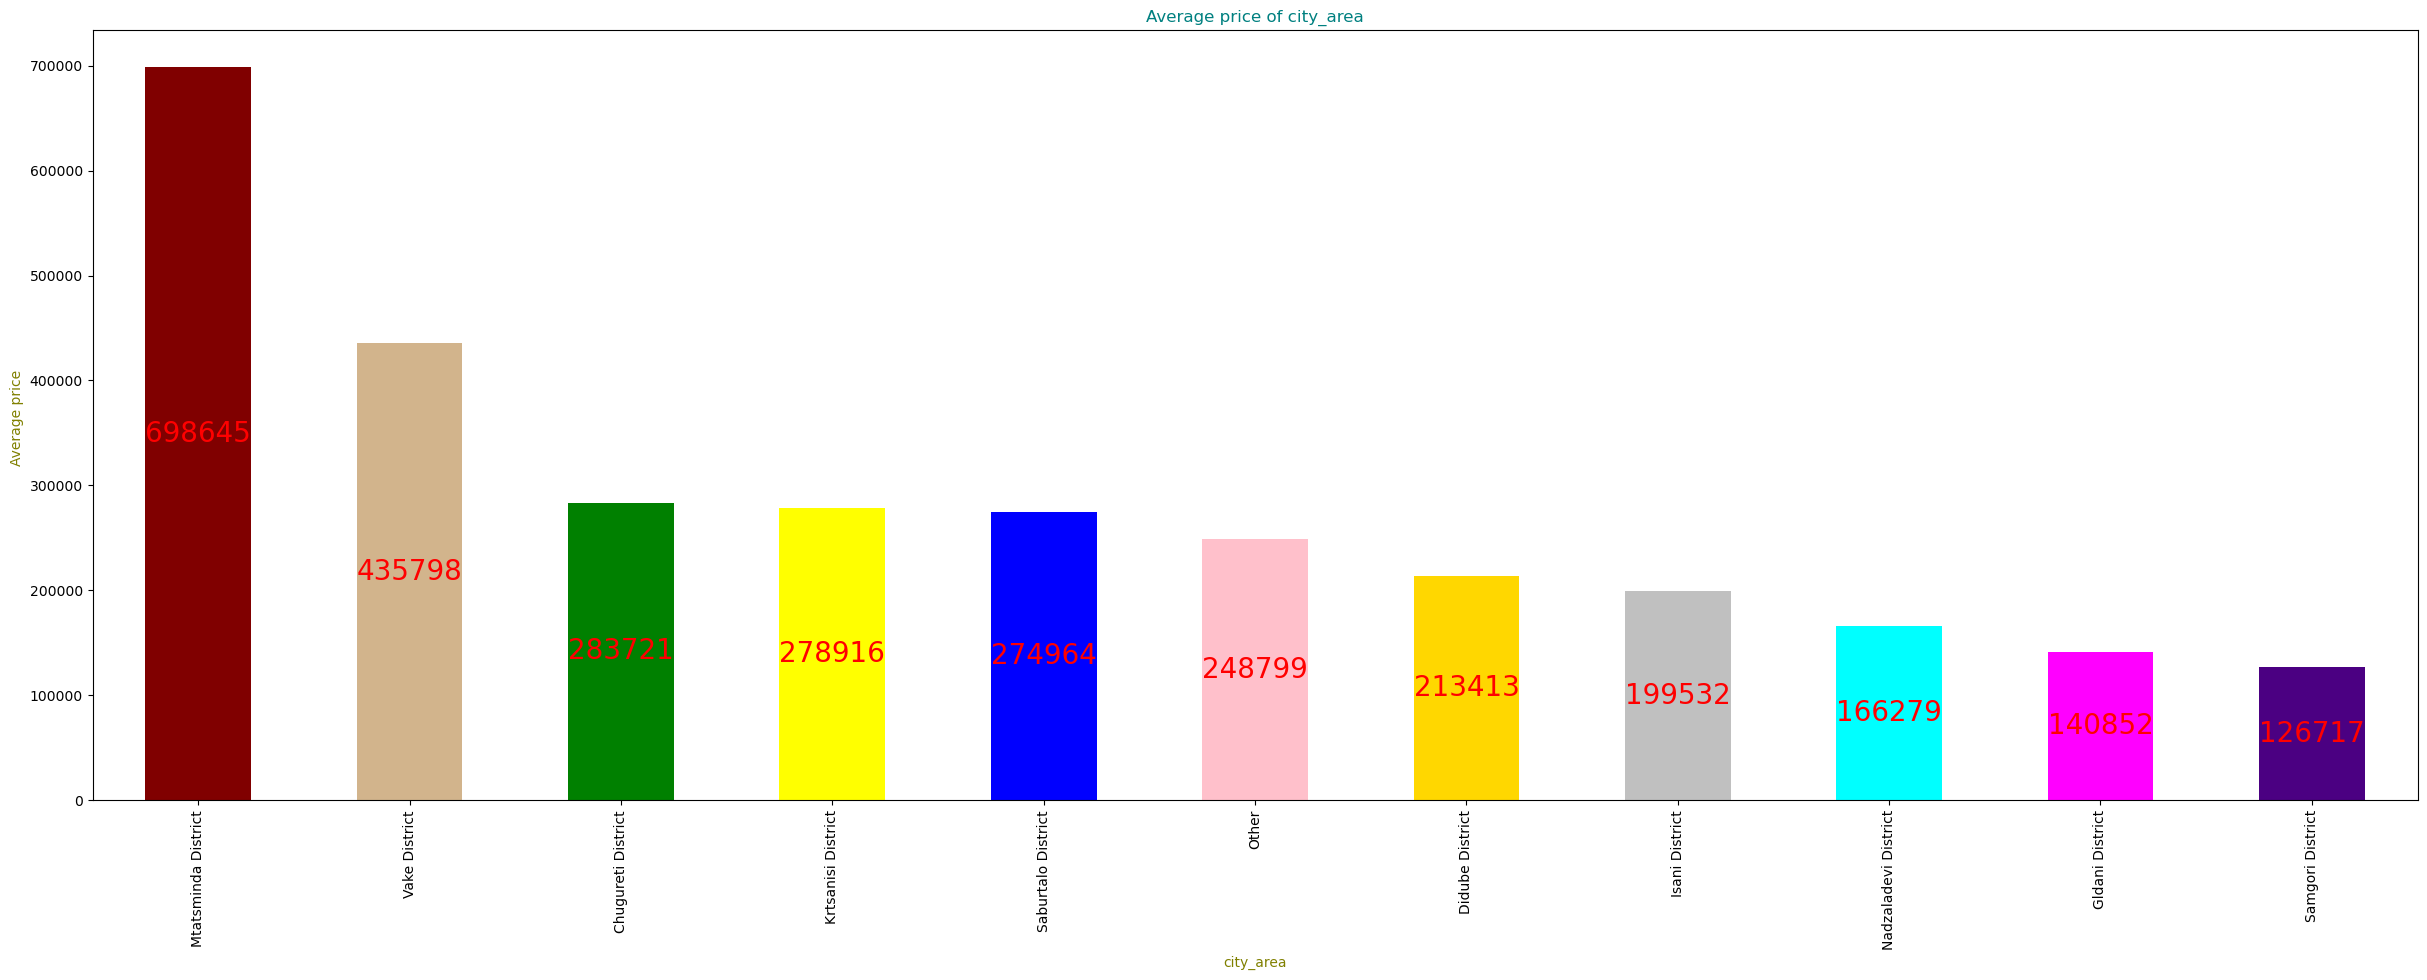

In [47]:
# what is the average price of city_area

print(housedf.price.groupby(housedf.city_area).mean())


plt.figure(figsize=(30,10))
df=housedf.price.groupby(housedf.city_area).mean().sort_values(ascending=False).plot(kind="bar",color=["Maroon","Tan","green","yellow","blue","pink",
                                                                          "gold","silver","cyan","Magenta","indigo"])
for i in df.containers:
    df.bar_label(i,fontsize=20,label_type="center",color="red")
    plt.xlabel("city_area",color="olive")
    plt.ylabel("Average price ",color="olive")
    plt.title("Average price of city_area",color="teal")

Text(0.5, 1.0, 'Average price of city_area in %')

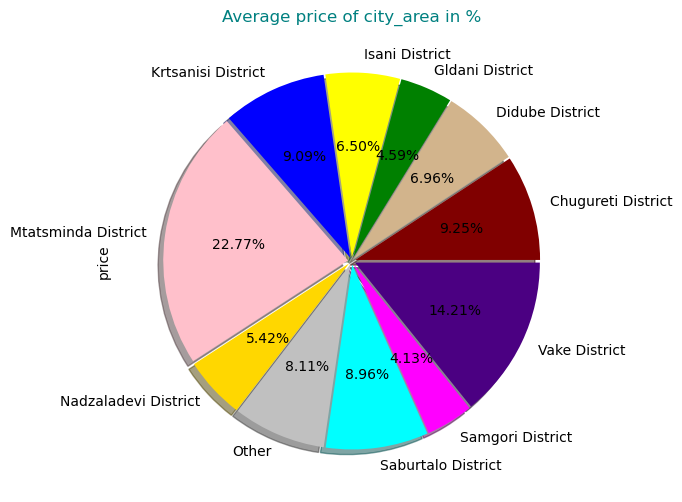

In [48]:
plt.figure(figsize=(6,6))
housedf.price.groupby(housedf.city_area).mean().plot(kind="pie",autopct="%.2f%%",shadow=True,
                explode=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,],
                 colors=["Maroon","Tan","green","yellow","blue","pink","gold","silver","cyan","Magenta","indigo"])
plt.title("Average price of city_area in %",color="teal")

# Comparison Between Columns And Visualization

apartment_type  construction    new   old
balcony                                  
0                        170   3497  2872
1                        987  16187  5491


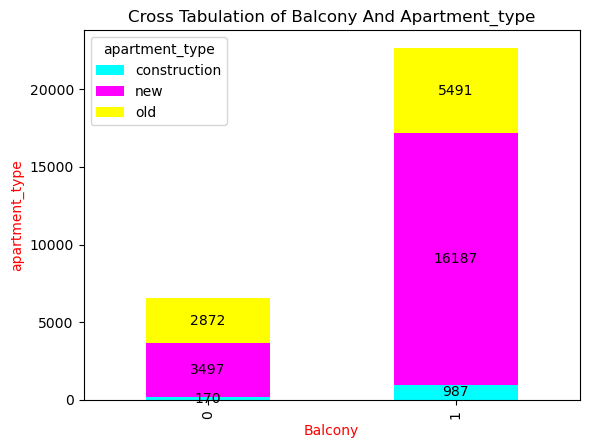

In [49]:
# How Many Houses Containes Balconys And How Many Houses Not Containes Balconys in Each Apartment_type With Visualization

print(pd.crosstab(housedf.balcony,housedf.apartment_type))

df=pd.crosstab(housedf.balcony,housedf.apartment_type)
ax=df.plot.bar(stacked=True,color=["cyan","Magenta","yellow"],title="Cross Tabulation of Balcony And Apartment_type")
for i in ax.containers:
    ax.bar_label(i,fontsize=10,label_type="center")
    plt.xlabel("Balcony",color="red")
    plt.ylabel("apartment_type",color="red")
   

furniture                0     1
city_area                       
Chugureti District     415   386
Didube District       1067   818
Gldani District        887   415
Isani District        1044   694
Krtsanisi District     409   355
Mtatsminda District    948   841
Nadzaladevi District   856   480
Other                 1326   719
Saburtalo District    6324  5319
Samgori District       801   491
Vake District         2552  2057


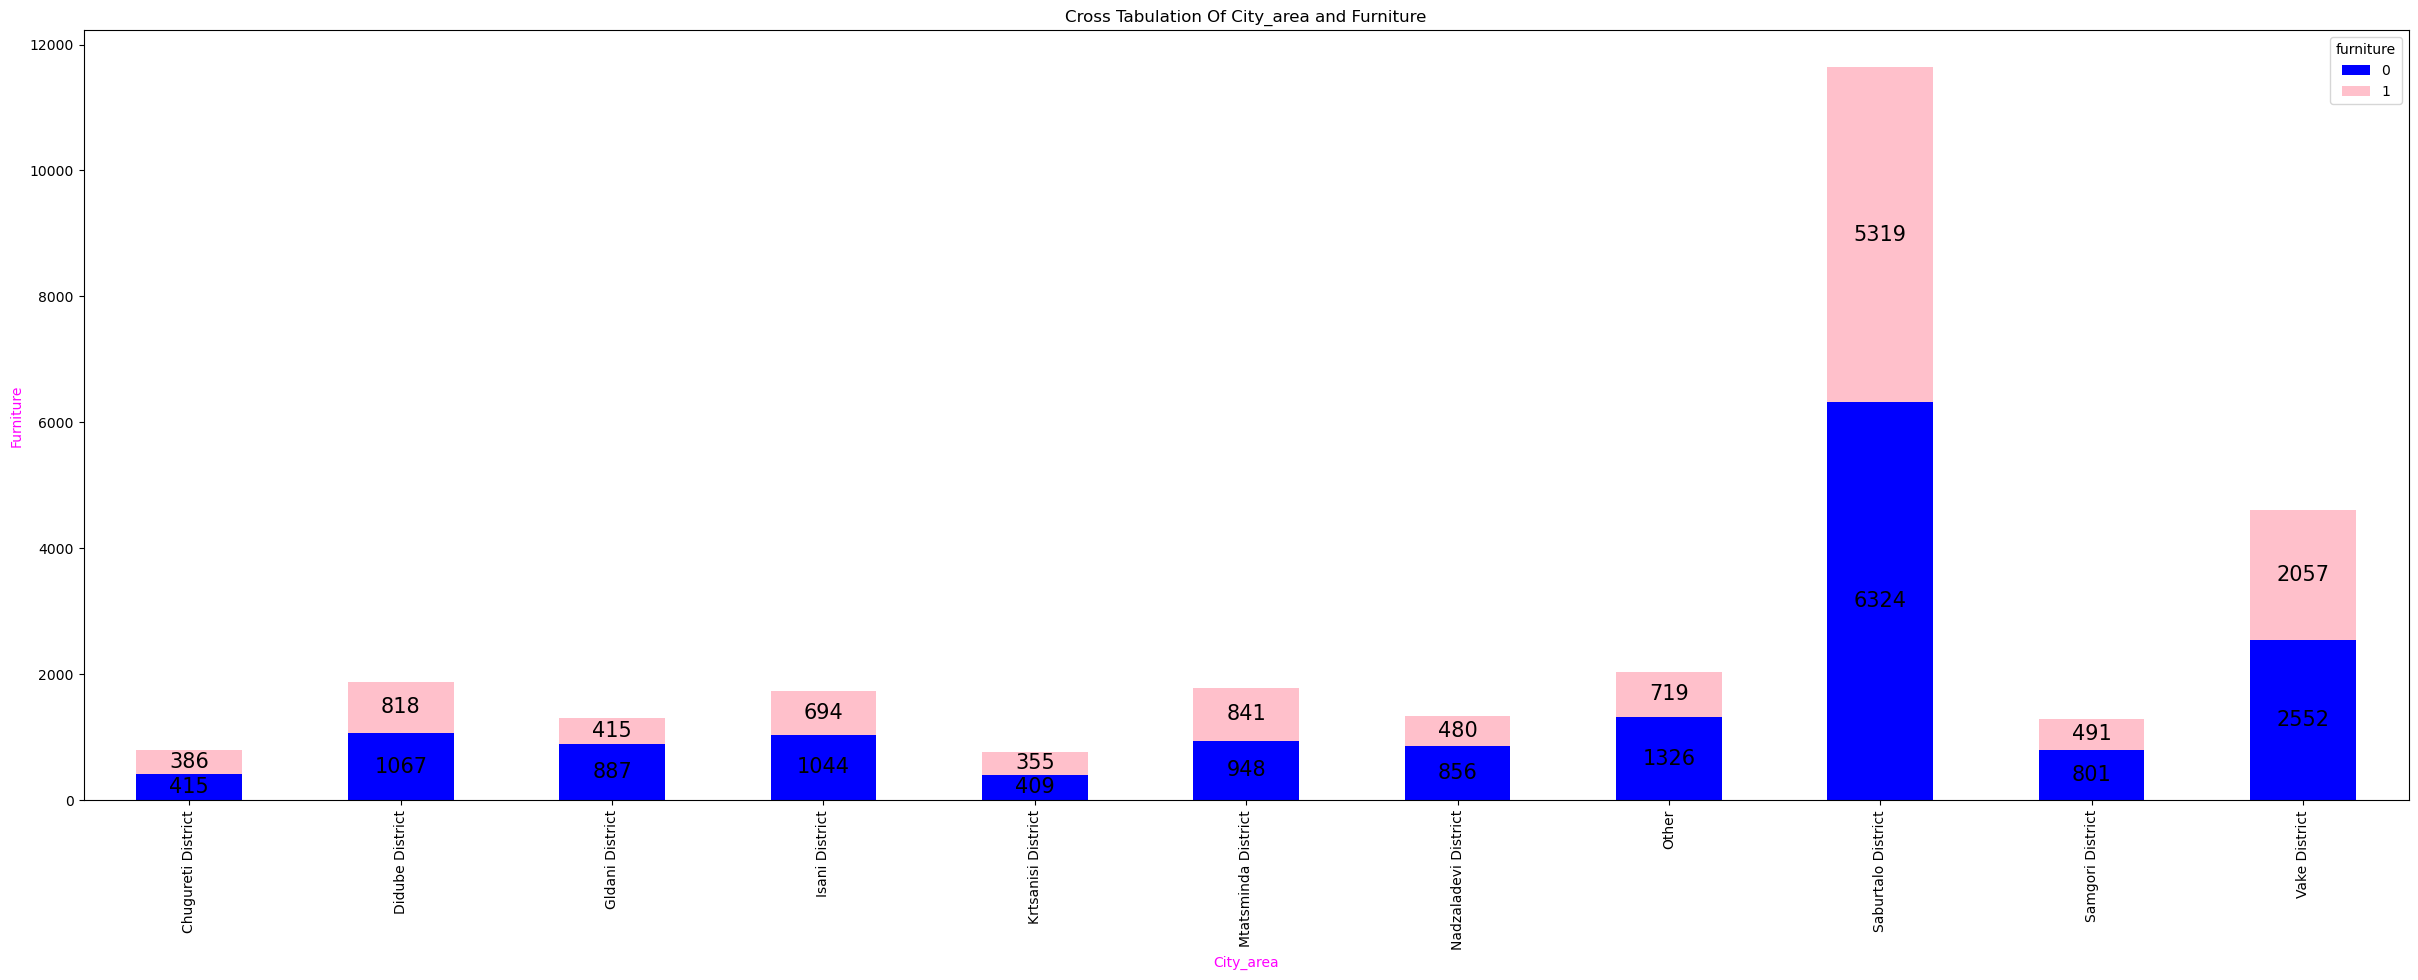

In [50]:
# How Many Citys Containes Furniture And How Many Houses Not Containes Furniture in Citys With Visualization


print(pd.crosstab(housedf.city_area,housedf.furniture))

df=pd.crosstab(housedf.city_area,housedf.furniture)
ax=df.plot.bar(stacked=True,color=["blue","pink"],title="Cross Tabulation Of City_area and Furniture",figsize=(30,10))
for i in ax.containers:
    ax.bar_label(i,fontsize=15,label_type="center")
    plt.xlabel("City_area",color="Magenta")
    plt.ylabel("Furniture",color="Magenta")

#  Hypothesis Testing

In [51]:
# 2 levels /groups/classes in categorical variable using "ttest_ind"

In [52]:
# Test Null Average Price of Balcony Containes and Not Containes(0/1 - No/Yes)

housedf.price.groupby(housedf.balcony).mean()

balcony
0    283701.208136
1    303208.619457
Name: price, dtype: float64

In [53]:
from scipy.stats import ttest_ind

In [54]:
# Splting

balconyNo=housedf[housedf.balcony==0]
balconyYes=housedf[housedf.balcony==1]

In [55]:
ttest_ind(balconyNo.price,balconyYes.price,equal_var=False)

Ttest_indResult(statistic=-1.2380440682513032, pvalue=0.21571008758213478)

In [56]:
# Test Null Average Price of Furniture Containes and Not Containes(0/1 - No/Yes)

housedf.price.groupby(housedf.furniture).mean()

furniture
0    285290.411931
1    316759.546720
Name: price, dtype: float64

In [57]:
furnitureNo=housedf[housedf.furniture==0]
furnitureYes=housedf[housedf.furniture==1]

In [58]:
ttest_ind(furnitureNo.price,furnitureYes.price,equal_var=False)

Ttest_indResult(statistic=-1.5642561867184792, pvalue=0.11777595757345086)

In [59]:
# More then 2 levels /groups/classes in categorical variable using Anoova "f_oneway"

In [60]:
# Test Null Average Price of Each Apartment_Type

housedf.price.groupby(housedf.apartment_type).mean()

apartment_type
construction    223184.096802
new             313151.196911
old             275625.182351
Name: price, dtype: float64

In [61]:
from scipy.stats import f_oneway

In [62]:
# Spliting

apartment_construction=housedf[housedf.apartment_type=="construction"]
apartment_new=housedf[housedf.apartment_type=="new"]
apartment_old=housedf[housedf.apartment_type=="old"]


In [63]:
f_oneway(apartment_construction.price,apartment_new.price,apartment_old.price)

F_onewayResult(statistic=1.9893004618112726, pvalue=0.1368096200532202)

In [64]:
# Both variables are categorical - chi-squre test of independence

In [65]:
# Test null no Association between Apartment_type and Balcony

pd.crosstab(housedf.apartment_type,housedf.balcony)

balcony,0,1
apartment_type,,
construction,170,987
new,3497,16187
old,2872,5491


In [66]:
from scipy.stats import chi2_contingency

In [67]:
chi2_contingency(pd.crosstab(housedf.apartment_type,housedf.balcony))

(969.1226248049088,
 3.6115686942018876e-211,
 2,
 array([[  259.06119025,   897.93880975],
        [ 4407.39884947, 15276.60115053],
        [ 1872.53996028,  6490.46003972]]))

In [68]:
pd.crosstab(housedf.room,housedf.furniture)

furniture,0,1
room,,
1,802,454
2,5278,4195
3,6577,5027
4,2796,1984
5,888,669
6,202,176
7,58,41
8,18,19
9,5,7


In [69]:
chi2_contingency(pd.crosstab(housedf.room,housedf.furniture))

(41.9298983893167,
 1.665595033301589e-05,
 11,
 array([[7.15176825e+02, 5.40823175e+02],
        [5.39400483e+03, 4.07899517e+03],
        [6.60741392e+03, 4.99658608e+03],
        [2.72177168e+03, 2.05822832e+03],
        [8.86568723e+02, 6.70431277e+02],
        [2.15236337e+02, 1.62763663e+02],
        [5.63714217e+01, 4.26285783e+01],
        [2.10681071e+01, 1.59318929e+01],
        [6.83289960e+00, 5.16710040e+00],
        [2.84704150e+00, 2.15295850e+00],
        [1.13881660e+00, 8.61183400e-01],
        [5.69408300e-01, 4.30591700e-01]]))

# Models Building

In [70]:
objcols.head()

,room,bedroom,furniture,city_area,floor,apartment_type,renovation_type,balcony
0,1,1,0,Saburtalo District,11.0,new,newly renovated,1
1,3,1,1,Isani District,15.0,new,newly renovated,0
2,2,1,0,Krtsanisi District,2.0,new,newly renovated,1
3,3,2,0,Krtsanisi District,3.0,new,newly renovated,1
4,2,1,0,Saburtalo District,14.0,old,newly renovated,0


In [71]:
# Catgorical Columns Convert From Object to Binary(0,1) for "Get_Dummies" 
# Catgorical Columns Convert From Object to Numbers(0,1,2,3) for "LabelEncoder" 

# Dummies

In [72]:
objcols_dummies=pd.get_dummies(objcols,columns=objcols.columns)

In [73]:
objcols_dummies.head()

,room_1,room_2,room_3,room_4,room_5,room_6,room_7,room_8,room_9,room_10,...,apartment_type_old,renovation_type_black frame,renovation_type_green frame,renovation_type_newly renovated,renovation_type_not renovated,renovation_type_old renovation,renovation_type_under renovation,renovation_type_white frame,balcony_0,balcony_1
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [74]:
objcols_dummies.shape

(29204, 79)

# LabelEncoder

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le=LabelEncoder()

In [77]:
objcols_LabelEncoder=objcols.apply(le.fit_transform)

In [78]:
objcols_LabelEncoder.head()

,room,bedroom,furniture,city_area,floor,apartment_type,renovation_type,balcony
0,0,1,0,8,11,1,2,1
1,2,1,1,3,15,1,2,0
2,1,1,0,4,2,1,2,1
3,2,2,0,4,3,1,2,1
4,1,1,0,8,14,2,2,0


In [79]:
numcols.head()

,space,price,max_floor
0,28.0,107100,11.0
1,72.0,257000,16.0
2,53.0,157200,4.0
3,80.0,237200,62.5
4,60.0,158200,62.5


# Scaleing

In [80]:
# StandardScaler

from sklearn.preprocessing import StandardScaler

In [81]:
scale=StandardScaler()

In [82]:
numcols_scale=scale.fit_transform(numcols)

In [83]:
numcols_scale=pd.DataFrame(numcols_scale,columns=numcols.columns)

In [84]:
numcols_scale.head()

,space,price,max_floor
0,-1.303000,-0.098222,-0.006152
1,-0.340555,-0.021434,0.739055
2,-0.756156,-0.072558,-1.049442
3,-0.165565,-0.031576,7.669483
4,-0.603040,-0.072045,7.669483


In [85]:
# RobustScaler

from sklearn.preprocessing import RobustScaler

In [86]:
Rscale=RobustScaler()

In [87]:
numcols_robust=Rscale.fit_transform(numcols)

In [88]:
numcols_robust=pd.DataFrame(numcols_robust,columns=numcols.columns)

In [89]:
numcols_robust.head()

,space,price,max_floor
0,-0.979167,-0.560440,0.142857
1,-0.062500,0.223967,0.857143
2,-0.458333,-0.298273,-0.857143
3,0.104167,0.120356,7.500000
4,-0.312500,-0.293040,7.500000


In [90]:
# After Done Dummies And Scaleing Concat the Object Columns And Numaric Columns

In [91]:
combinedf=pd.concat([numcols_robust,objcols_dummies],axis=1)

In [92]:
combinedf.head()

,space,price,max_floor,room_1,room_2,room_3,room_4,room_5,room_6,room_7,...,apartment_type_old,renovation_type_black frame,renovation_type_green frame,renovation_type_newly renovated,renovation_type_not renovated,renovation_type_old renovation,renovation_type_under renovation,renovation_type_white frame,balcony_0,balcony_1
0,-0.979167,-0.560440,0.142857,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,-0.062500,0.223967,0.857143,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,-0.458333,-0.298273,-0.857143,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.104167,0.120356,7.500000,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,-0.312500,-0.293040,7.500000,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


# Spliting Data Independent And Dependent Variable for Models Building

In [93]:
y=combinedf.price   # "y" is Dependent Variable

x=combinedf.drop("price",axis=1)   # "X" is Independent Variables

# Dependent Variable is Numaric we Build all Models are Regrission

# 1. Linear Regrission

In [94]:
from sklearn.linear_model import LinearRegression

In [106]:
Regression=LinearRegression()

In [107]:
Regressionmodel=Regression.fit(x,y)

In [108]:
Regressionmodel.score(x,y)

0.011901144826748422

In [109]:
Regressionpredication=regmodel.predict(x)

In [110]:
pd.DataFrame(Regressionpredication).to_csv("reg.csv")

In [111]:
Regressionpredication

array([-0.58761597, -0.02825928,  0.42514038, ..., -0.40933228,
        0.19790649, -0.14068604])

In [112]:
Regressionresid=y-Regressionpredication

In [113]:
Regressionresid

0        0.027176
1        0.252226
2       -0.723414
3        0.048487
4       -0.101878
           ...   
29199   -1.090285
29200   -0.688105
29201   -0.385016
29202   -0.443851
29203   -0.094269
Name: price, Length: 29204, dtype: float64

# 2.DecisionTreeRegressor

In [114]:
from sklearn.tree import DecisionTreeRegressor

In [131]:
tree=DecisionTreeRegressor(max_depth=8)

In [132]:
treemodel=tree.fit(x,y)

In [133]:
treemodel.score(x,y)

0.9949056189075409

In [144]:
treepredication=treemodel.predict(x)

In [145]:
pd.DataFrame(treepredication).to_csv("tree.csv")

In [146]:
treepredication

array([-0.70829546, -0.12253748, -0.23904692, ..., -0.70829546,
        0.23862443, -0.3297452 ])

In [147]:
treeresid=y-treepredication

In [148]:
treeresid

array([0., 0., 0., ..., 0., 0., 0.])

# 3.GradientBoostingRegressor 

In [149]:
from sklearn.ensemble import GradientBoostingRegressor

In [153]:
gbr=GradientBoostingRegressor(n_estimators=2000)

In [154]:
gbrmodel=gbr.fit(x,y)

In [155]:
gbrmodel.score(x,y)

0.2684490661841734

In [156]:
gbrpredication=gbrmodel.predict(x)

In [157]:
pd.DataFrame(gbrpredication).to_csv("GradientBoostingRegressor.csv")

In [158]:
gbrpredication

array([-0.95286821,  0.1027421 , -0.25878231, ...,  0.22096643,
        0.10594577,  0.00218059])

In [159]:
gbrresid=y-gbrpredication

In [160]:
gbrresid

array([ 0.24457274, -0.22527958,  0.01973539, ..., -0.92926189,
        0.13267866, -0.3319258 ])

# 4.RandomForestRegressor

In [161]:
from sklearn.ensemble import RandomForestRegressor

In [162]:
rfr=RandomForestRegressor(n_estimators=1000)

In [163]:
rfrmodel=rfr.fit(x,y)

In [164]:
rfrmodel.score(x,y)

0.8009656277268908

In [165]:
rfrpredication=rfrmodel.predict(x)

In [166]:
pd.DataFrame(rfrpredication).to_csv("RandomForestRegressor.csv")

In [167]:
rfrpredication

array([-0.70829546, -0.12253748, -0.23904692, ..., -0.70829546,
        0.23862443, -0.3297452 ])

In [168]:
rfrresid=y-rfrpredication

In [169]:
rfrresid

array([-4.44089210e-15, -2.96984659e-15, -1.69309011e-15, ...,
       -4.44089210e-15, -1.63757896e-15, -3.05311332e-15])